In [1]:
import cv2
import pytesseract 
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.animation
import numpy as np
import pandas as pd
import seaborn as sns
import math
from IPython.display import HTML
from scipy import stats
from scipy.signal import butter, lfilter

## Function for Line Plots

In [2]:
# Creating a plotting function
def correlation_plot(df):
    
    # Creating x, y0, y1, y2
    x = df['minutes']
    y0 = df['CorrVO2HR']
    y1 = df['CorrVeVCO2']
    y2 = df['CorrVCO2VO2']
    title = df.PatientId.unique()[0]

    # Empty canvas of 1 by 2 subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,6))
    fig.suptitle('Patient ID: {}'.format(title))

    axes[0].plot(x,y0,color="black", lw=3, ls='--')
    axes[1].plot(x,y1,color="blue", lw=3, ls='-')
    axes[2].plot(x,y2,color="red", lw=3, ls=':')

    axes[0].set_xlabel("Vo2 vs HR")
    axes[1].set_xlabel("VeV vs Co2")
    axes[2].set_xlabel("VCo2 vs Vo2")

## Function for Patient Heatmap 
### Unable to get this to print out the results like the Line Plots

In [3]:
def heatmap_plot(df):
    title = df.PatientId.unique()[0]
    del df['Unnamed: 0']
    del df['PatientId']
    
    df.style.background_gradient(cmap='coolwarm') 
    print('Patient ID: {}'.format(title))

## Reading in the Data

In [4]:
df = pd.read_csv('data_corr_averaged.csv')
patient_id_list = df.PatientId.unique()

## Manual Heat Map Attempt

### Horizontal Version

In [5]:
# This answers the mail, I just couldn't get it into a function.
df_small =df[df['PatientId'] == 4]
del df_small['Unnamed: 0']
del df_small['PatientId']

df_small_t = df_small.transpose()

print("One Patient Heatmap of Key Variables over Time")
print(" ")
df_small_t.style.background_gradient(cmap='coolwarm') 

One Patient Heatmap of Key Variables over Time
 


### Vertical Version

In [6]:
# This answers the mail, I just couldn't get it into a function.
df_small =df[df['PatientId'] == 5]
del df_small['Unnamed: 0']
del df_small['PatientId']

# df_small_t = df_small.transpose()

print("One Patient Heatmap of Key Variables over Time")
print(" ")
df_small.style.background_gradient(cmap='coolwarm', subset=['CorrVO2HR', 'CorrVeVCO2', 'CorrVCO2VO2']) 

One Patient Heatmap of Key Variables over Time
 


## Line Plot of Correlations

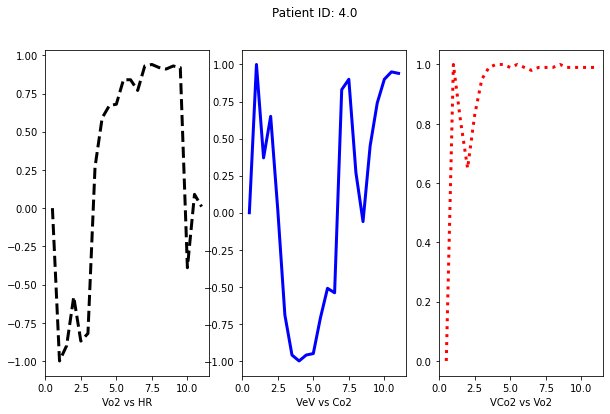

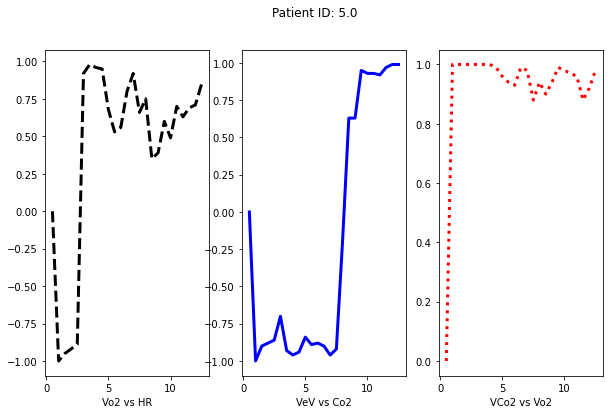

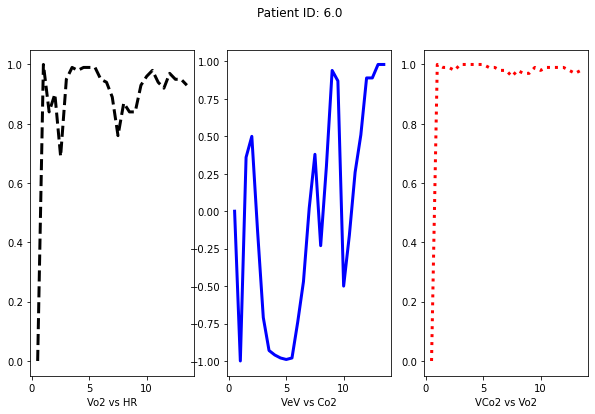

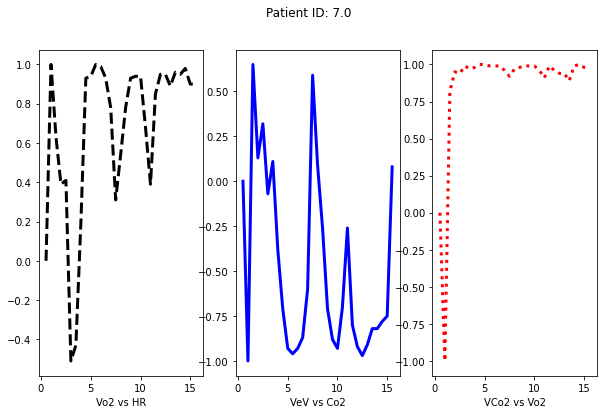

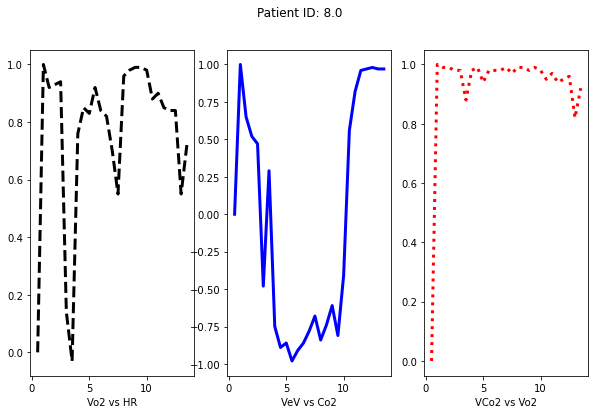

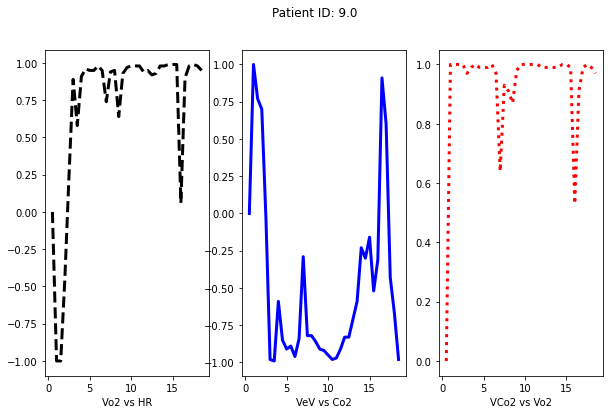

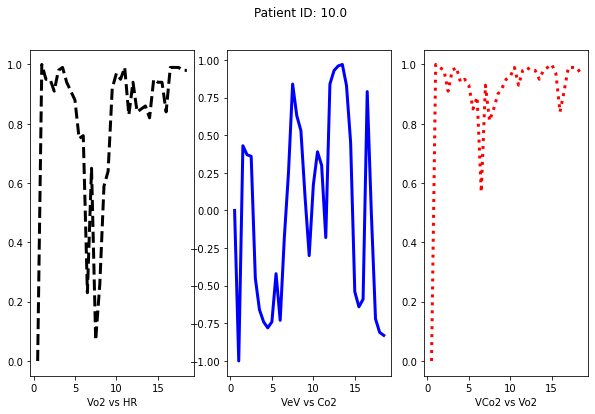

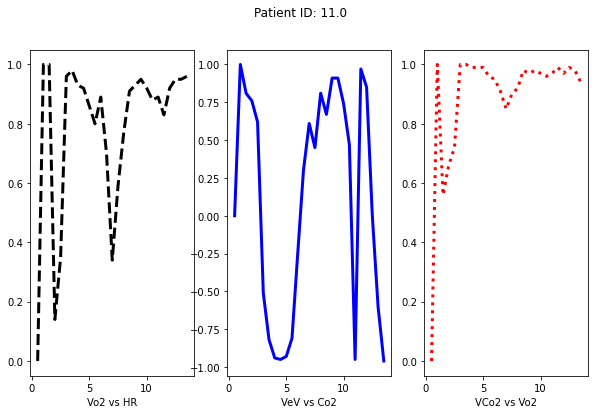

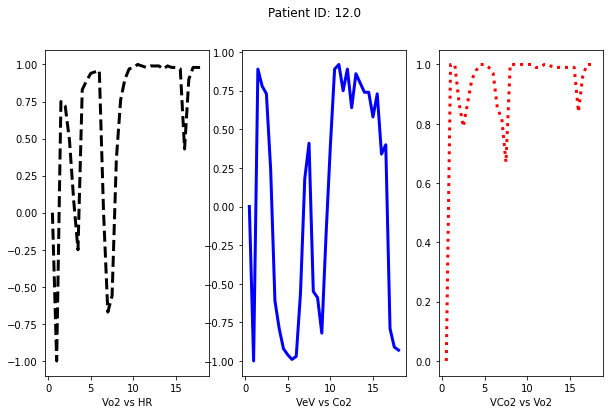

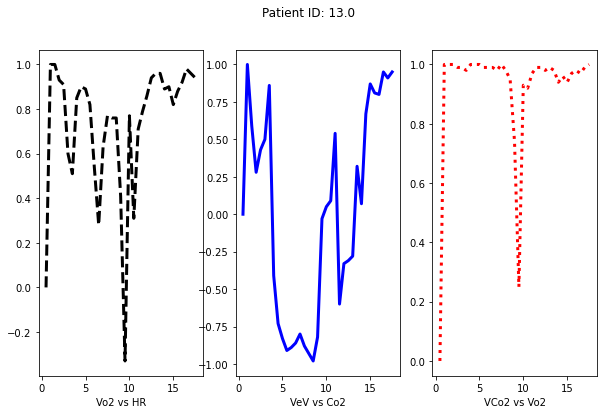

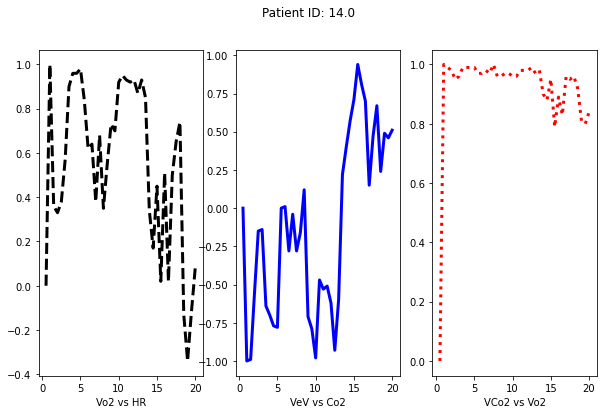

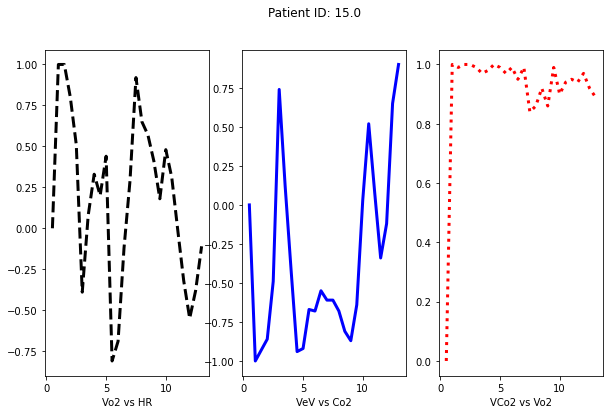

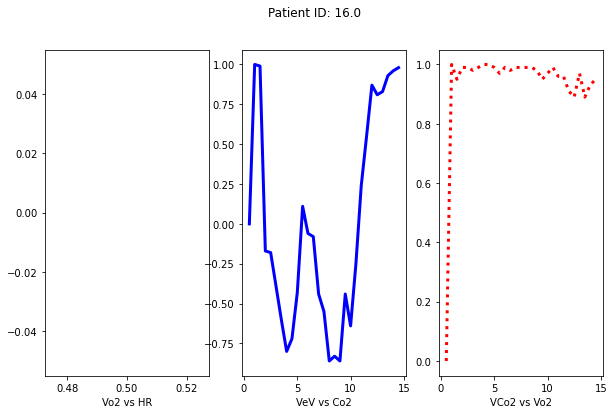

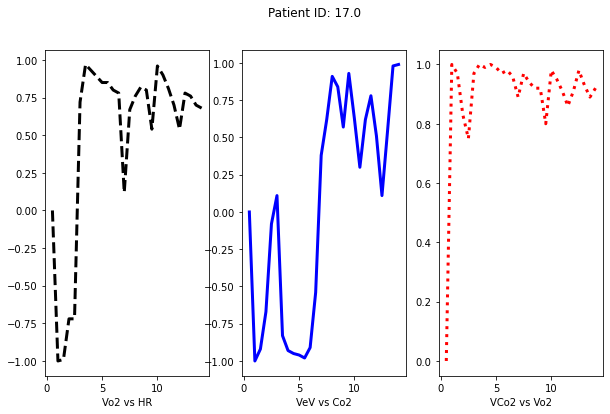

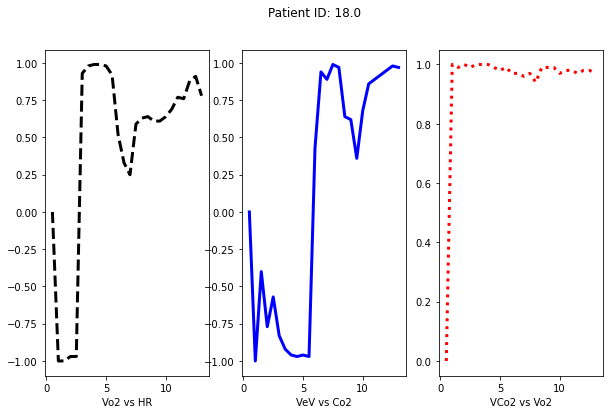

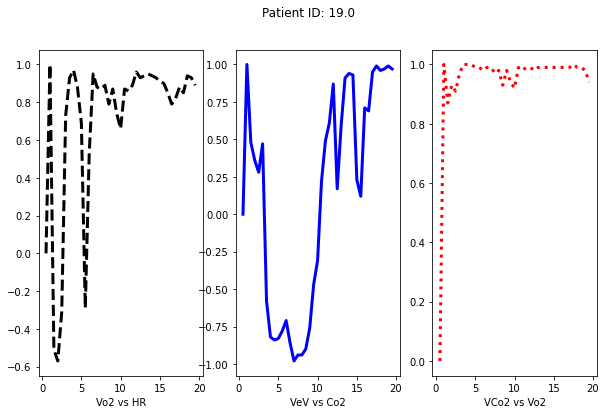

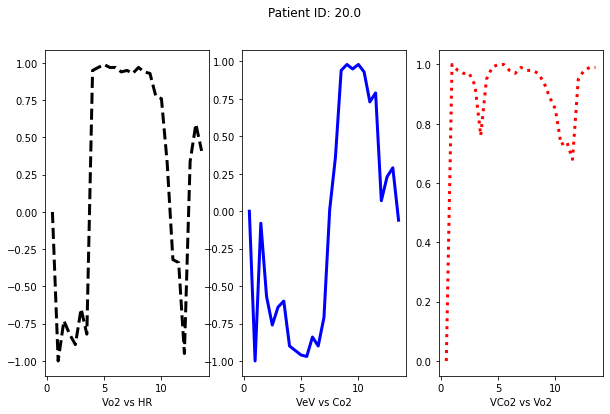

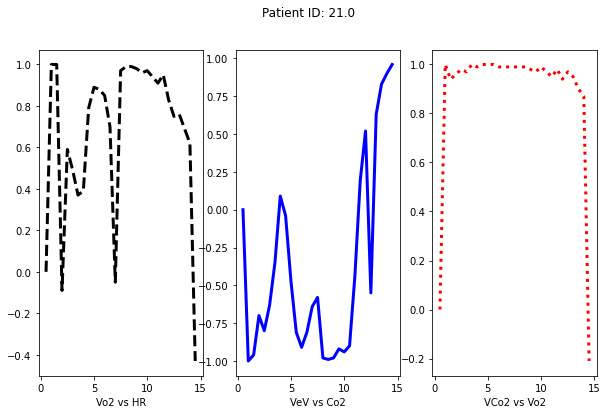

In [7]:
for i in patient_id_list:
    df_func =df[df['PatientId'] == i]
    correlation_plot(df_func)